# Read data

In [3]:
filename = "./dataset/sesja1_pawel_zaciskanie_dloni.bdf"

In [4]:
import matplotlib.pyplot as plt

from Utilities.converter import FileConverter

signals, markers = FileConverter().preconvert_file(filename)

# Running mean on signals

In [5]:
import numpy as np

freq = FileConverter.DATASET_FREQ
mean_window = freq * 3

In [6]:
signals_mean = []
for s in signals:
    s = (s - np.min(s)) / (np.max(s) - np.min(s))
    signals_mean.append(s)

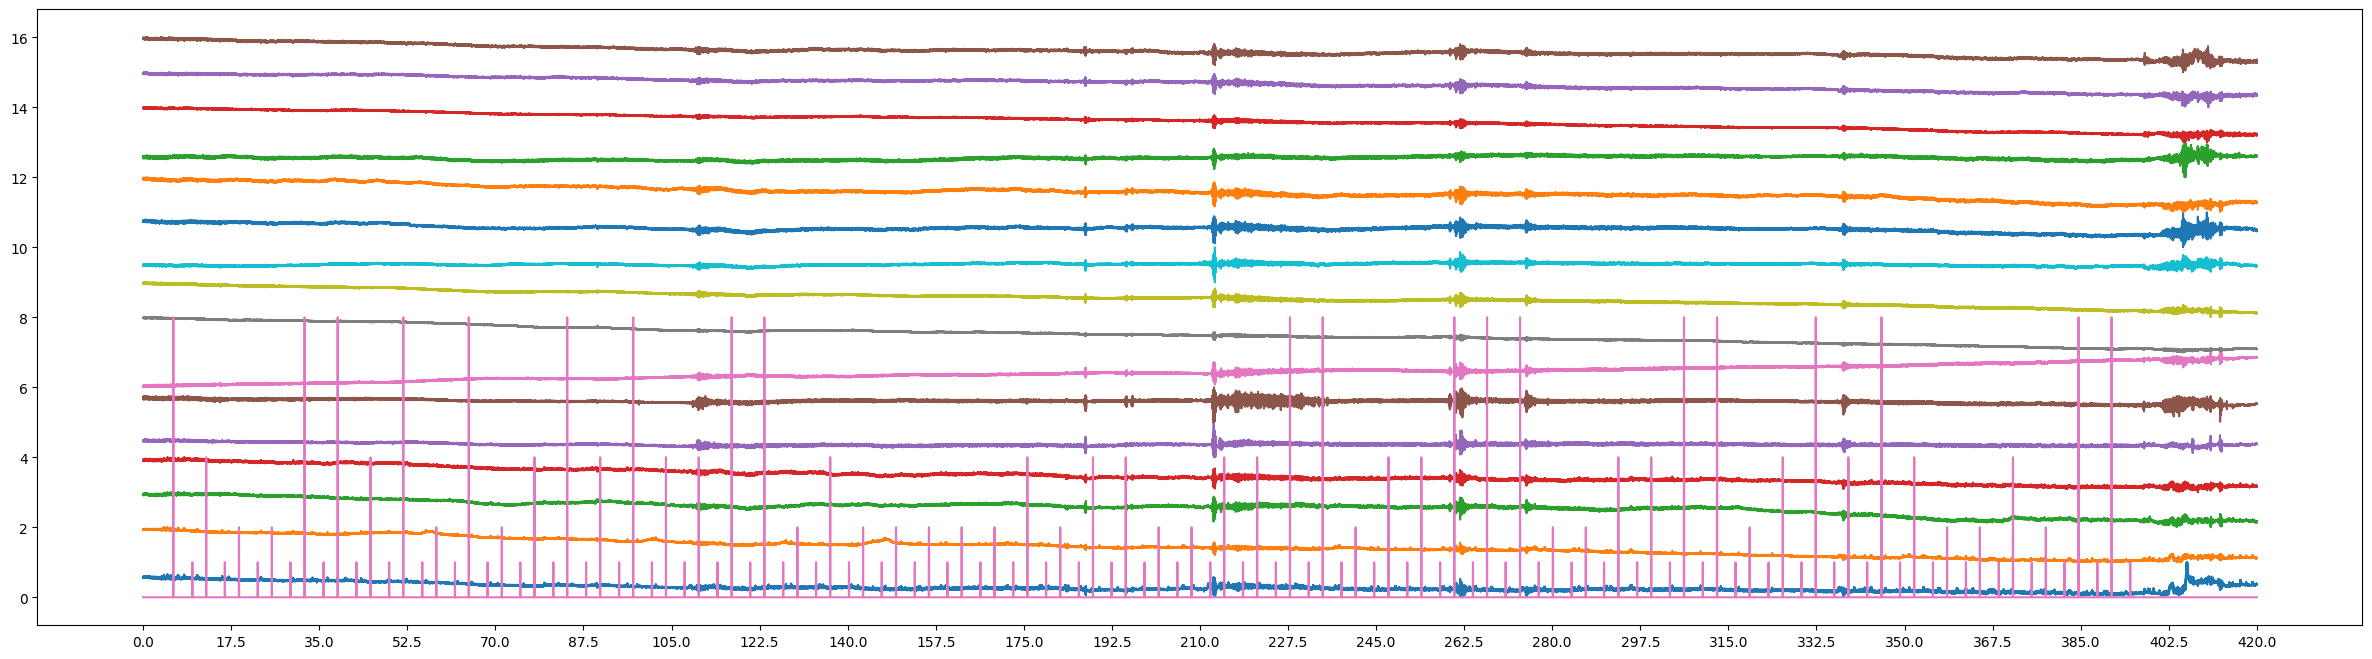

In [7]:
signal_samples = np.array(signals_mean)

fig, ax = plt.subplots()

fig.set_size_inches(30,8)

for i, s in enumerate(signal_samples):
    ax.plot(np.linspace(0, 7*60, num=len(s)), s+i)
    
ax.plot(np.linspace(0, 7*60, num=len(markers)), markers)

ax.set_xticks(np.linspace(0, 7*60, num=25))

plt.show()

# Slice data

In [8]:
impulses_names = ["BREAK", "LEFT", "RIGHT", "RELAX"]

type_of_slice = None
slicing = False
slice_start_index = None

all_slices = []
for i in range(len(markers)):
    m = markers[i]
    
    if not slicing:
        if m > 1:
            slicing = True
            slice_start_index = i
            type_of_slice = int(np.log2(m))
        else:
            continue
            
    else:
        if m == 1:
            current_slice = signal_samples[:, slice_start_index:i]
            
            all_slices.append({
                "impulse_name": impulses_names[type_of_slice],
                "impulse_signal": current_slice,
                "duration_s": (i - slice_start_index) / freq
            })
            
            slicing = False
            slice_start_index = None
            type_of_slice = None
        else:
            continue

In [9]:
import os

bn = os.path.basename(filename)[:-4]
savepath = os.path.join("dataset", bn)

if not os.path.exists(savepath):
    os.makedirs(savepath)

In [10]:
plt.figure(figsize=(10, 5), dpi=100)

for i, impulse in enumerate(all_slices):
    name = impulse["impulse_name"]
    signal = impulse["impulse_signal"]
    duration = impulse["duration_s"]
    
    data_filename = os.path.join(savepath, f"{i}.npy")
    np.save(data_filename, impulse)

    for j, s in enumerate(signal):
        plt.title(name)
        plt.plot(np.linspace(0, duration, num=len(s)), s+j)

    fig_filename = os.path.join(savepath, f"{i}.jpg")
    plt.savefig(fig_filename, dpi=100)
    
    plt.clf()

<Figure size 1000x500 with 0 Axes>

In [11]:
test = np.load(os.path.join(savepath, f"0.npy"), allow_pickle=True)
test

array({'impulse_name': 'RELAX', 'impulse_signal': array([[0.5420896 , 0.54199374, 0.54211456, ..., 0.5379092 , 0.5328262 ,
        0.53131497],
       [0.9141863 , 0.91495705, 0.91529477, ..., 0.8994684 , 0.8971423 ,
        0.89624316],
       [0.93412983, 0.93693006, 0.9384112 , ..., 0.94520235, 0.9431679 ,
        0.94116527],
       ...,
       [0.98063236, 0.9809808 , 0.98034114, ..., 0.9692838 , 0.9686913 ,
        0.9675353 ],
       [0.96595675, 0.96627545, 0.9660787 , ..., 0.9570795 , 0.95494944,
        0.95402116],
       [0.96547866, 0.96646076, 0.96774113, ..., 0.9506616 , 0.9482937 ,
        0.94850206]], dtype=float32), 'duration_s': 4.125}, dtype=object)